## Detect Cancer Using Classification

## 1.Introduction

In [1]:
from IPython.display import Image
import os
!ls ../input/detectcancer

How-To-Detect-Cancer-826x599.png


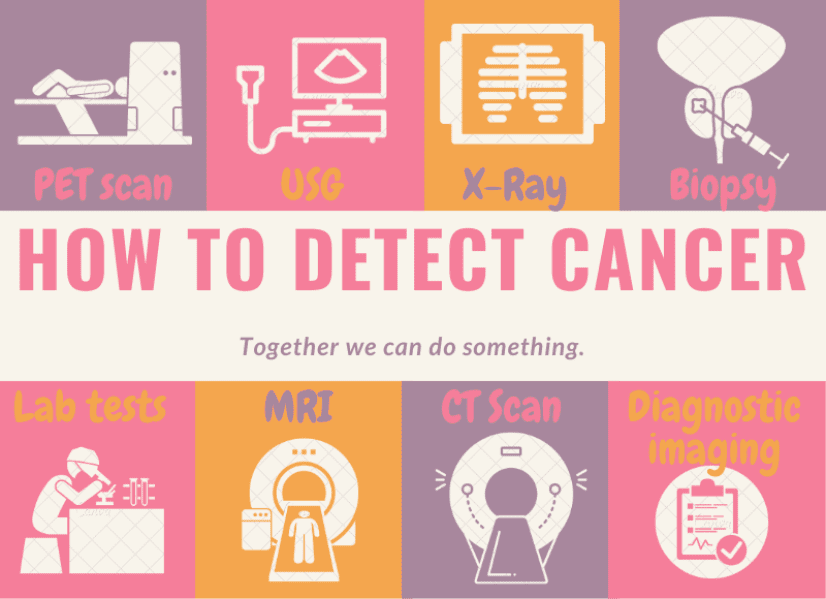

In [2]:
Image("/kaggle/input/detectcancer/How-To-Detect-Cancer-826x599.png")

### 1.1 Import Libraries 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv('/kaggle/input/cancer-classification/cancer_classification.csv')

**Check first rown**

In [5]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Check information of data frame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**Descriptive Statistic Analysis**

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### 1.2 Check the relationship between variables

**Check the number of people with cancer**

Text(0.5, 1.0, 'The graph shows the number of people with(1) and without cancer(0)')

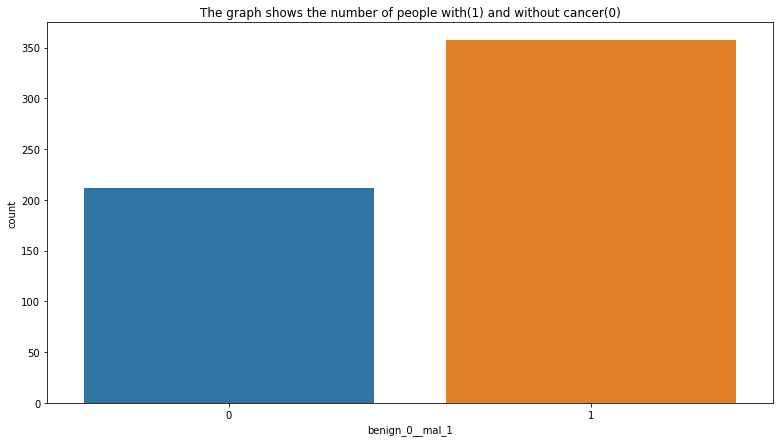

In [8]:
plt.figure(figsize=(13,7))
sns.countplot(x='benign_0__mal_1',data=df)
plt.title("The graph shows the number of people with(1) and without cancer(0)")

**Covariance Matrix**

In [9]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


**The graph shows the interaction ratio between the variables**

Text(0.5, 1.0, 'The graph shows the interaction ratio between the variables')

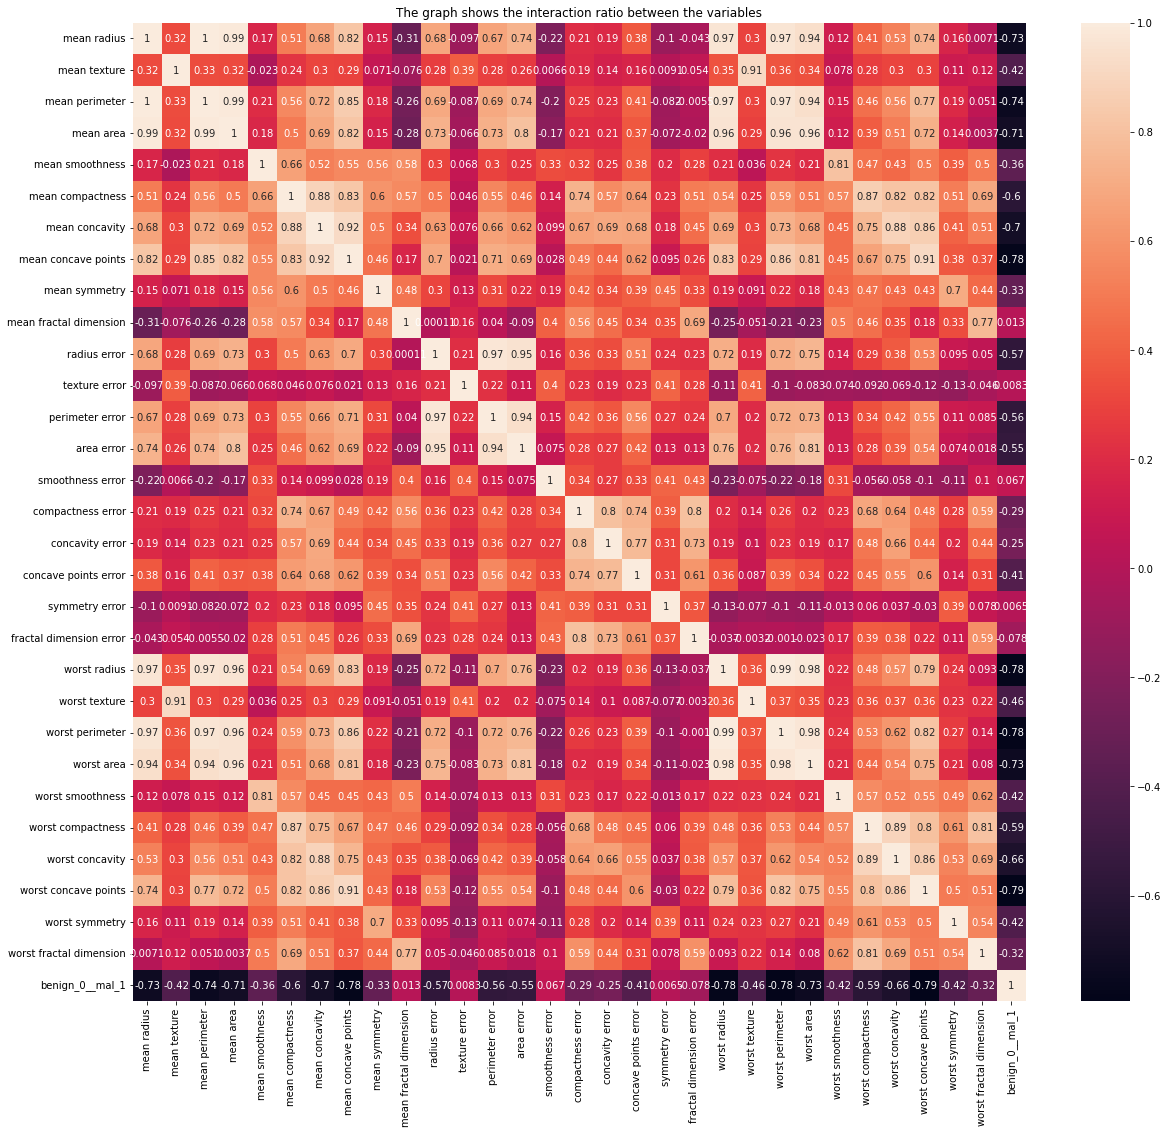

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)
plt.title("The graph shows the interaction ratio between the variables")

**Covariance Matrix Sort Value By [benign_0__mal_1] variable**

In [11]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

**Chart Show Sort Value By [benign_0__mal_1] Variable**

Text(0.5, 1.0, 'Chart Show Sort Value By [benign_0__mal_1] Variable')

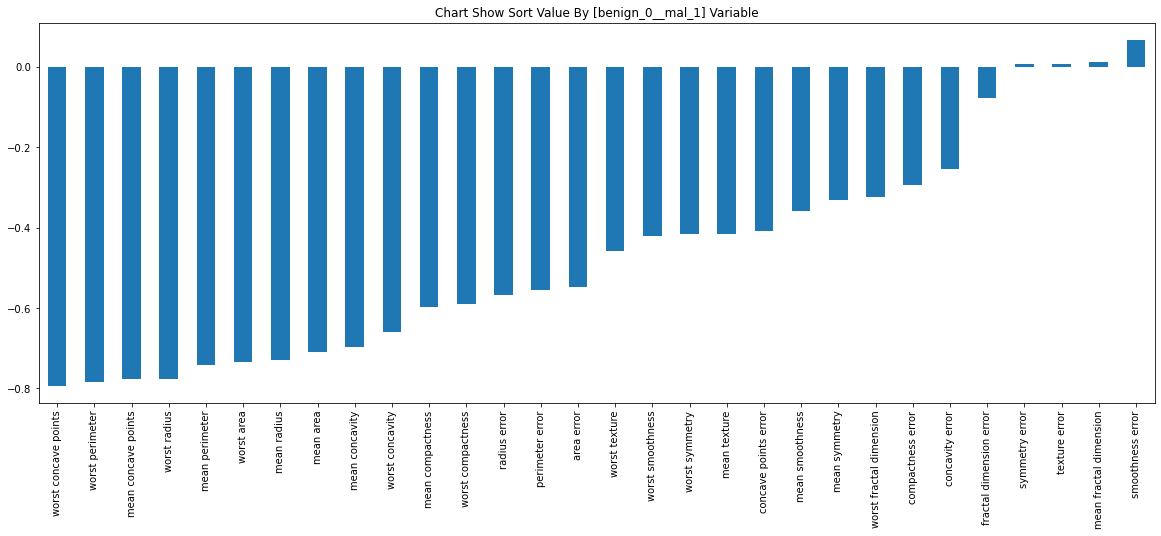

In [12]:
plt.figure(figsize=(20,7))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.title("Chart Show Sort Value By [benign_0__mal_1] Variable")

## 2. Preprocessing Model

In [13]:
X=df.drop('benign_0__mal_1',axis=1)
X.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
y=df['benign_0__mal_1']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: benign_0__mal_1, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
X_train=scaler.fit_transform(X_train)

In [20]:
X_test=scaler.transform(X_test)

In [21]:
X_train.shape

(426, 30)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Dropout

In [24]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

2023-02-12 16:24:39.822958: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

2023-02-12 16:24:40.239512: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6887 - val_loss: 0.6555
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6472 - val_loss: 0.6198
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6054 - val_loss: 0.5796
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5618 - val_loss: 0.5354
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5172 - val_loss: 0.4903
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4716 - val_loss: 0.4440
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4268 - val_loss: 0.3992
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3836 - val_loss: 0.3594
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3472 - val_loss: 0.3200
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3140 - val_loss: 0.2885
Epoch 11

In [26]:
model.history.history

{'loss': [0.6886525750160217,
  0.6472082138061523,
  0.6053545475006104,
  0.5617712736129761,
  0.5171855092048645,
  0.47164401412010193,
  0.4267503023147583,
  0.3835799992084503,
  0.3471895754337311,
  0.31397104263305664,
  0.28499287366867065,
  0.2609744071960449,
  0.23789693415164948,
  0.22162294387817383,
  0.21019423007965088,
  0.19366438686847687,
  0.18126223981380463,
  0.16868856549263,
  0.15997400879859924,
  0.15372100472450256,
  0.14655080437660217,
  0.1376732587814331,
  0.12876558303833008,
  0.1253388673067093,
  0.12020111829042435,
  0.1133369728922844,
  0.10901904851198196,
  0.1036139652132988,
  0.10023844242095947,
  0.09582719951868057,
  0.09354477375745773,
  0.09016186743974686,
  0.08719760924577713,
  0.08585778623819351,
  0.08457479625940323,
  0.08190598338842392,
  0.07716294378042221,
  0.07660744339227676,
  0.07447929680347443,
  0.07168591022491455,
  0.07092880457639694,
  0.07058249413967133,
  0.06831776350736618,
  0.067502960562706

In [27]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.688653,0.655534
1,0.647208,0.619753
2,0.605355,0.579561
3,0.561771,0.535382
4,0.517186,0.490280
...,...,...
595,0.006575,0.127558
596,0.006874,0.131733
597,0.006394,0.126094
598,0.006989,0.127587


<AxesSubplot:>

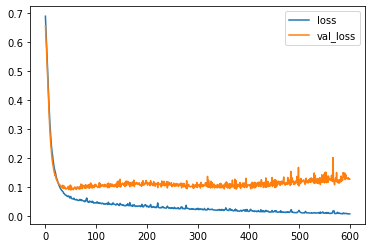

In [28]:
pd.DataFrame(model.history.history).plot()

## 3. Dealing With Overfitting

In [29]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary Classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam")

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=2,patience=25)

In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6771 - val_loss: 0.6551
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6374 - val_loss: 0.6174
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5985 - val_loss: 0.5776
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5570 - val_loss: 0.5342
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5140 - val_loss: 0.4882
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4670 - val_loss: 0.4420
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4220 - val_loss: 0.3942
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3790 - val_loss: 0.3510
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3405 - val_loss: 0.3139
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3080 - val_loss: 0.2826
Epoch 11

<AxesSubplot:>

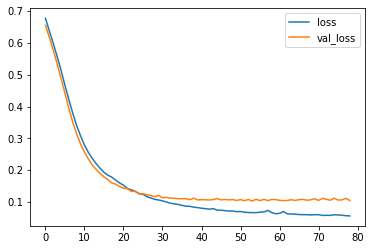

In [34]:
pd.DataFrame(model.history.history).plot()

## 4. Adding dropout layers

In [35]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7359 - val_loss: 0.7001
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7174 - val_loss: 0.6793
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7014 - val_loss: 0.6656
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6915 - val_loss: 0.6561
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6729 - val_loss: 0.6392
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6486 - val_loss: 0.6182
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6291 - val_loss: 0.5993
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6072 - val_loss: 0.5748
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5946 - val_loss: 0.5478
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5669 - val_loss: 0.5183
Epoch 11

<AxesSubplot:>

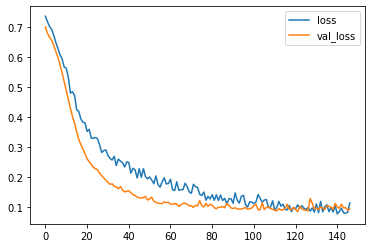

In [37]:
pd.DataFrame(model.history.history).plot()

In [38]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [39]:
predictions.shape

(143, 1)

In [40]:
pd.DataFrame(predictions, columns=['class'])

,class
0,1
1,1
2,1
3,0
4,1
...,...
138,0
139,1
140,0
141,1


In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
